In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_df.shape

(7043, 21)

In [5]:
churn_df.size

147903

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn_df.drop('customerID',axis=1,inplace=True)

In [8]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')


In [9]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
churn_df.dropna(inplace=True)

In [12]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
churn_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7032,3,No,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
column_all=churn_df.columns
column_all

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
categorical_column=churn_df.select_dtypes(include=['object']).columns
categorical_column

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [16]:
numerical_column = [col for col in column_all if col not in categorical_column] 
numerical_column

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
churn_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
for col in churn_df.columns:
    if churn_df[col].dtype != 'int64' and churn_df[col].dtype != 'float64':
        print(f'{col} : {churn_df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
churn_df.replace('No internet service','No',inplace=True)
churn_df.replace('No phone service','No',inplace=True)

In [20]:
for col in churn_df.columns:
    if churn_df[col].dtype != 'int64' and churn_df[col].dtype != 'float64':
        print(f'{col} : {churn_df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


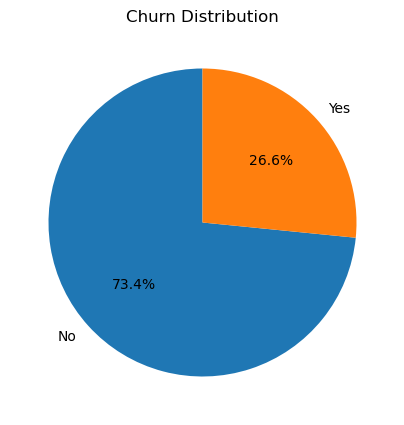

In [21]:
churn_counts=churn_df['Churn'].value_counts()
plt.figure(figsize=(5, 5))
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.ylabel('')  
plt.show()

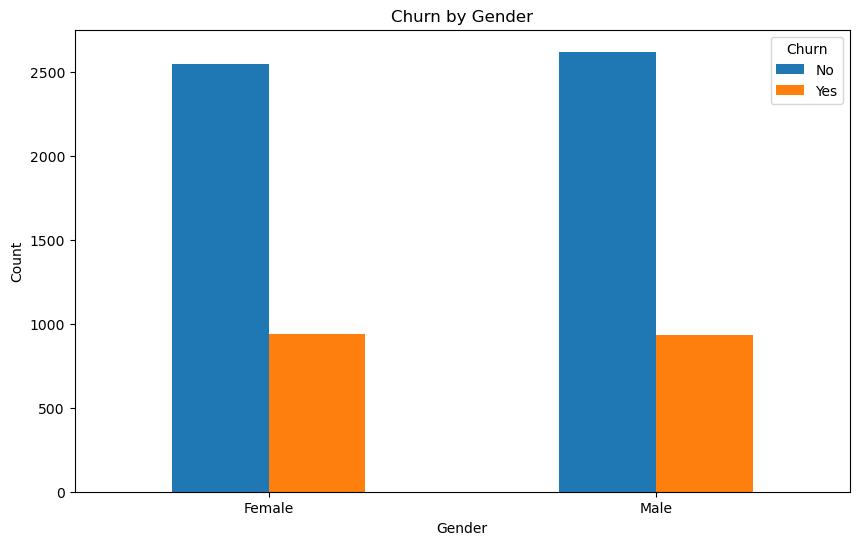

In [22]:
churn_gender_counts = churn_df.groupby(['gender', 'Churn']).size().unstack()
churn_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

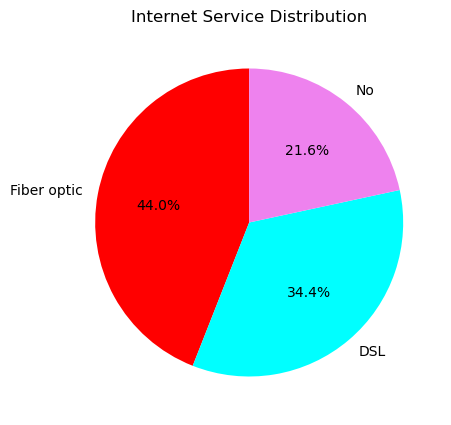

In [23]:
internet_service_counts = churn_df['InternetService'].value_counts()
plt.figure(figsize=(5, 5))
internet_service_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'cyan', 'violet'])
plt.title('Internet Service Distribution')
plt.ylabel('')  
plt.show()

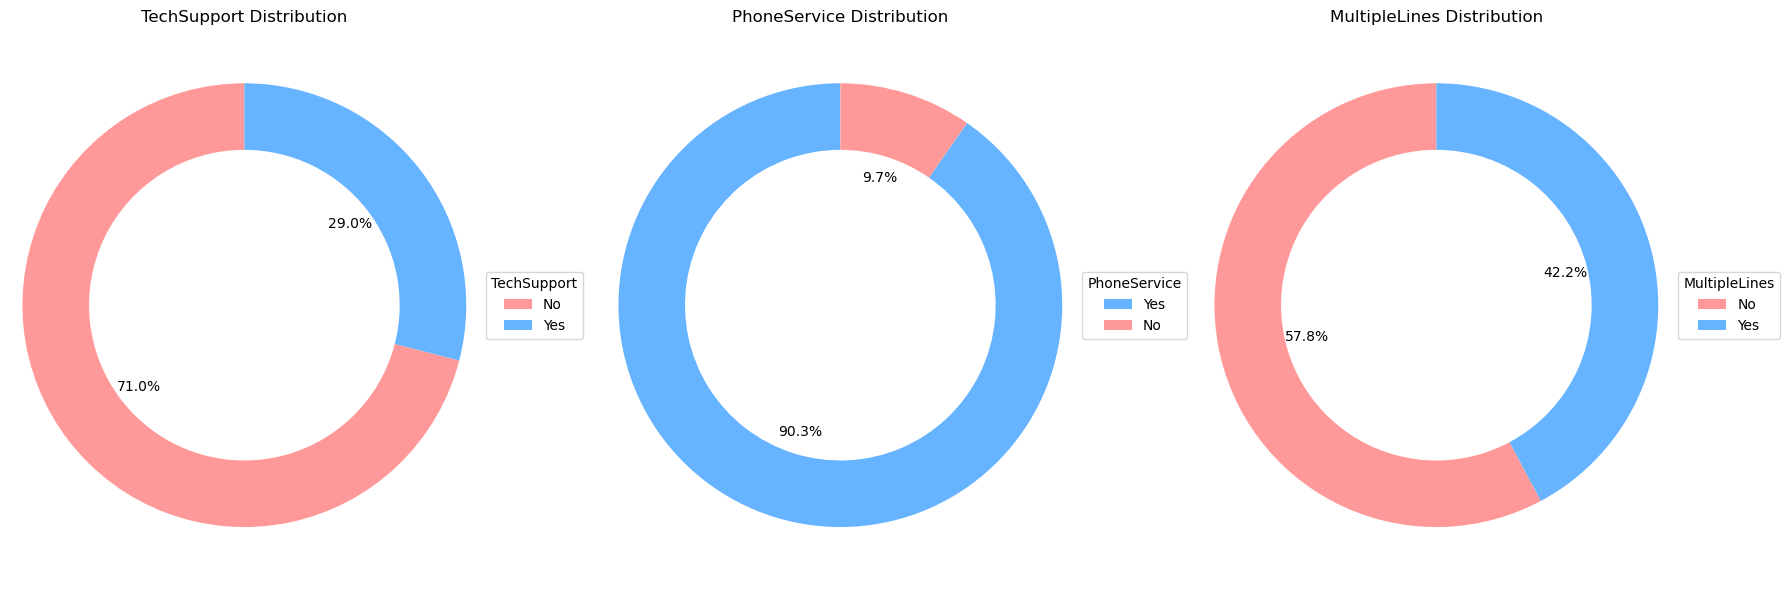

In [24]:
color_map = {'Yes': '#66b3ff', 'No': '#ff9999'}
columns = ['TechSupport', 'PhoneService', 'MultipleLines']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for col, ax in zip(columns, axes):
    counts = churn_df[col].value_counts()
    colors = [color_map[val] for val in counts.index]
    wedges, texts, autotexts = ax.pie(
        counts, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,
        wedgeprops=dict(width=0.3)  
    )
    ax.set_title(f'{col} Distribution')
    ax.legend(wedges, counts.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.axis('equal')  
plt.tight_layout()
plt.show()

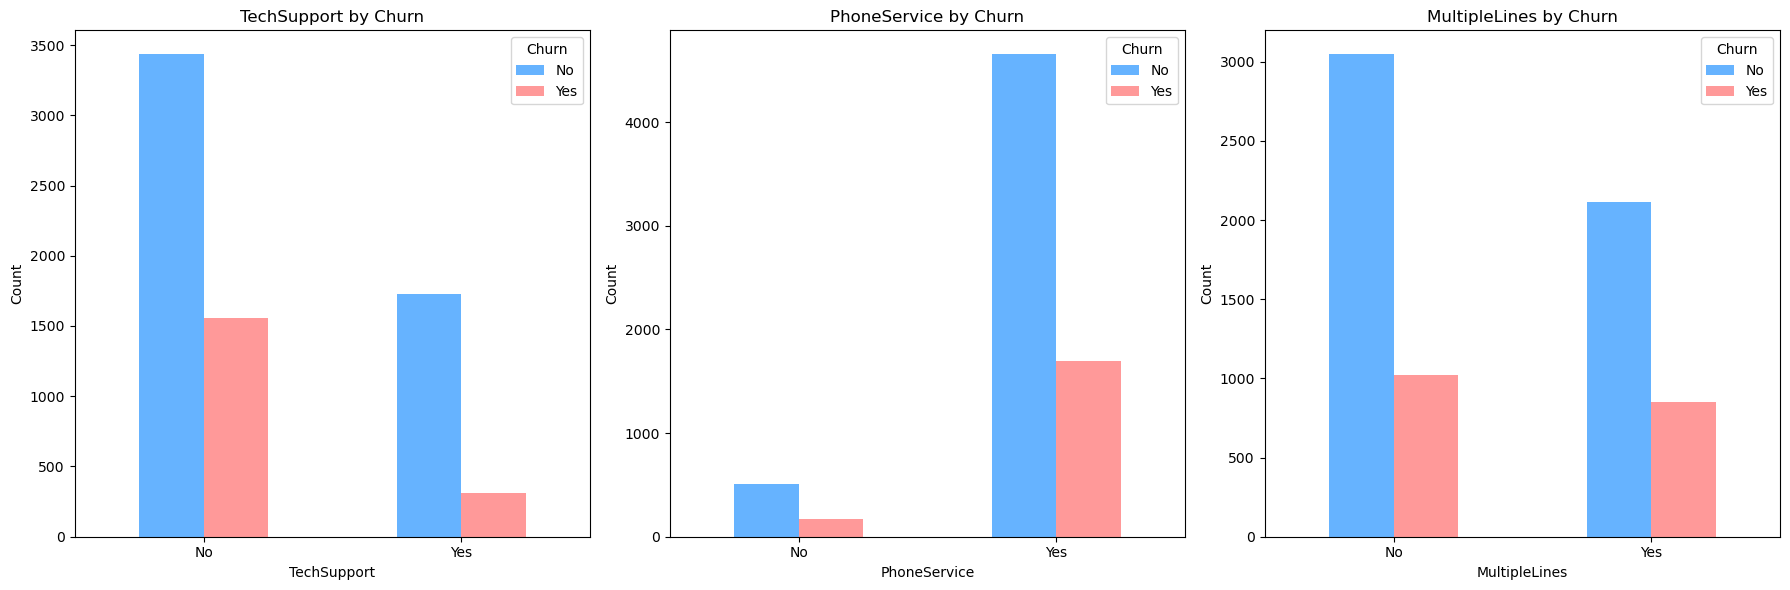

In [25]:
columns = ['TechSupport', 'PhoneService', 'MultipleLines']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for col, ax in zip(columns, axes):
    counts = churn_df.groupby([col, 'Churn']).size().unstack()
    counts.plot(kind='bar', ax=ax, color=['#66b3ff', '#ff9999'])
    ax.set_title(f'{col} by Churn')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(counts.index, rotation=0)
    ax.legend(title='Churn')

plt.tight_layout()
plt.show()

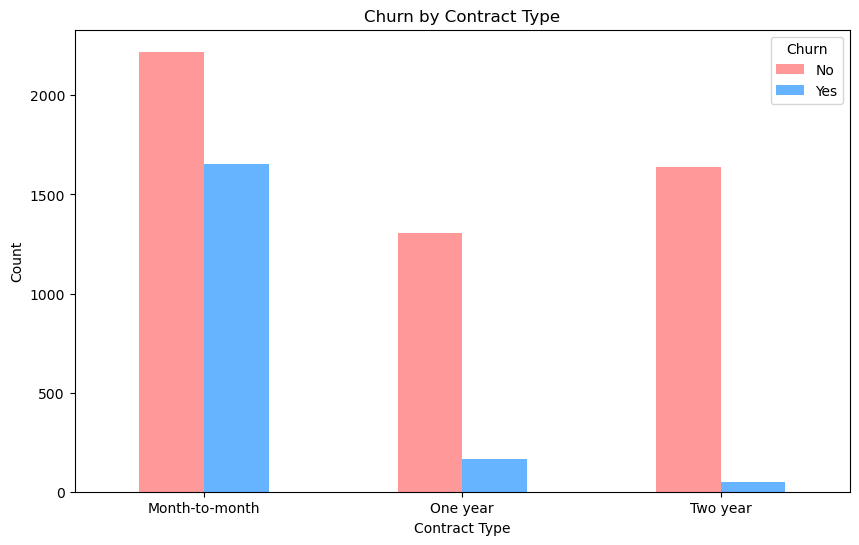

In [26]:
churn_contract_counts = churn_df.groupby(['Contract', 'Churn']).size().unstack()
churn_contract_counts.plot(kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

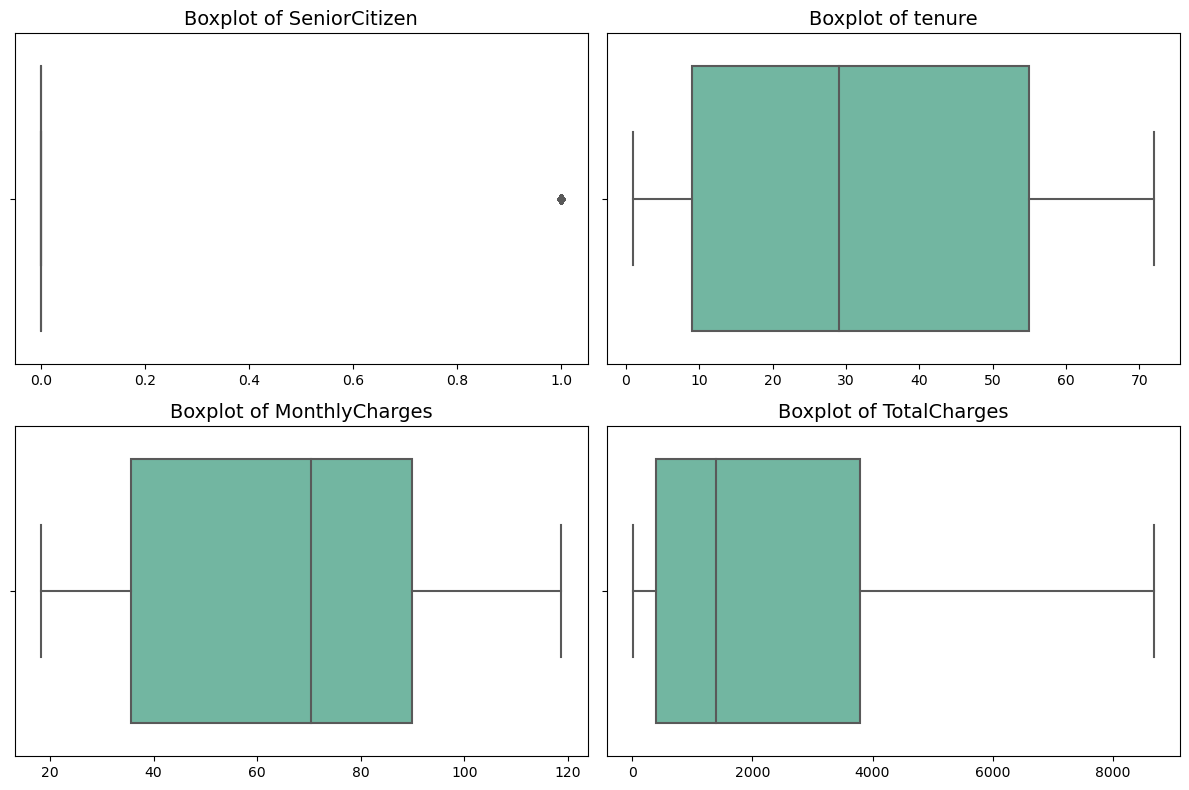

In [27]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_column, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=churn_df[column], orient='h', palette='Set2')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder=LabelEncoder()

In [30]:
for column in categorical_column:
    churn_df[column] = label_encoder.fit_transform(churn_df[column])

In [31]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


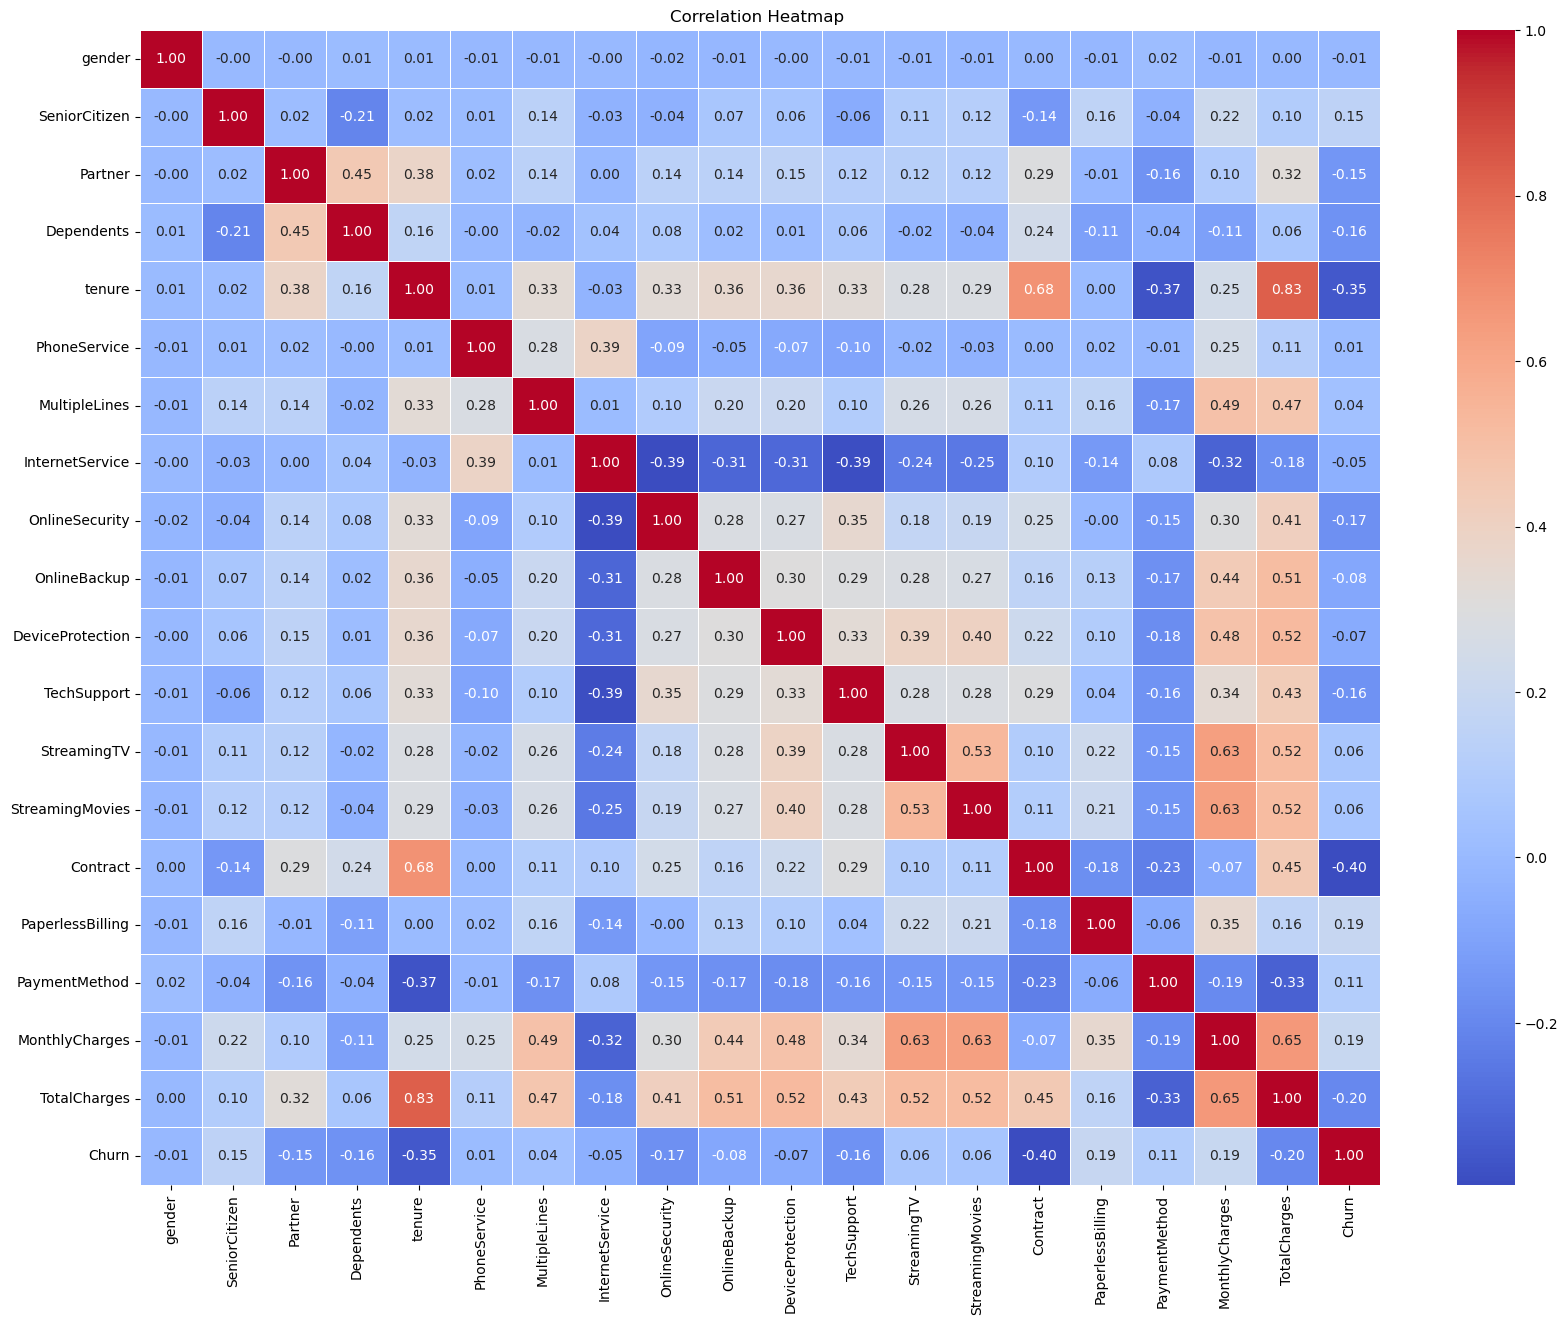

In [32]:
plt.figure(figsize=(20, 15))
sns.heatmap(churn_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap ')
plt.show()

In [33]:
X=churn_df.drop(['Churn'],axis=1)
Y=churn_df['Churn']
print('shape of x :',X.shape)
print('shape of Y:',Y.shape)

shape of x : (7032, 19)
shape of Y: (7032,)


Churn
0    5163
1    1869
Name: count, dtype: int64


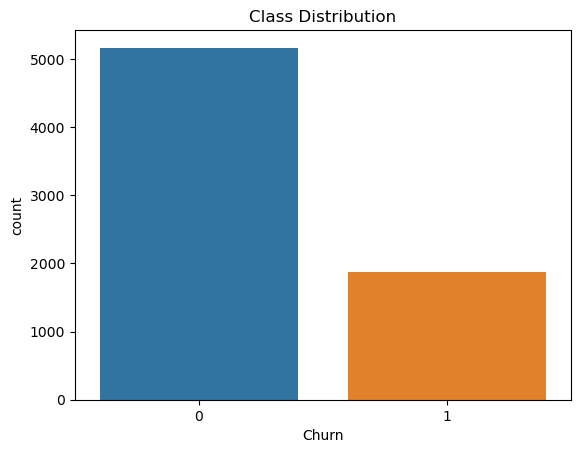

In [34]:
target_column = 'Churn'  
class_distribution = churn_df[target_column].value_counts()
print(class_distribution)
sns.countplot(x=target_column, data=churn_df)
plt.title('Class Distribution')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (5625, 19)
X_test (1407, 19)
Y_train (5625,)
Y_test (1407,)


In [39]:
Y_train.value_counts()

Churn
0    4125
1    1500
Name: count, dtype: int64

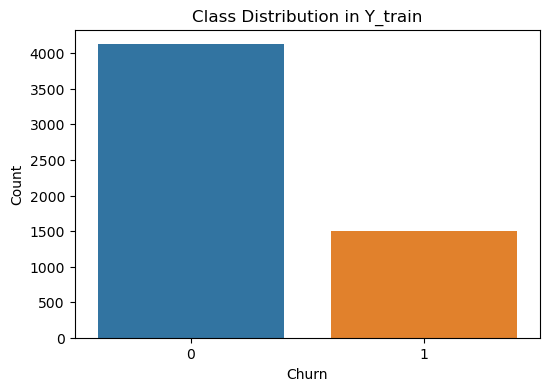

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train)
plt.title('Class Distribution in Y_train')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [41]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced', C=1, penalty='l2', solver='liblinear')
lr_model.fit(X_train, Y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
lr_train_accuracy = accuracy_score(Y_train, y_train_pred)
lr_test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Logistic Regression Train Accuracy:", lr_train_accuracy)
print("Logistic Regression Test Accuracy:", lr_test_accuracy)


Logistic Regression Train Accuracy: 0.7468444444444444
Logistic Regression Test Accuracy: 0.7427149964463398


In [42]:
print("classification report on training data")
print(classification_report(Y_train,y_train_pred))

classification report on training data
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      4125
           1       0.52      0.81      0.63      1500

    accuracy                           0.75      5625
   macro avg       0.71      0.77      0.72      5625
weighted avg       0.81      0.75      0.76      5625



In [43]:
print("classification report on testing data")
print(classification_report(Y_test,y_test_pred))

classification report on testing data
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1038
           1       0.51      0.80      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.76      1407



In [44]:
rfcl = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Train the model
rfcl.fit(X_train, Y_train)

# Make predictions on the training and testing sets
y_train_pred = rfcl.predict(X_train)
y_test_pred = rfcl.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.7438222222222223
Test Accuracy: 0.7476901208244492


In [45]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, Y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [47]:
yr_train.value_counts()

Churn
1    2575
0    2094
Name: count, dtype: int64

In [48]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

scaler = StandardScaler()
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=3, verbose=0)
rf_grid.fit(Xr_train_scaled, yr_train)

rf_best_model = rf_grid.best_estimator_

y_train_pred = rf_best_model.predict(Xr_train_scaled)
y_test_pred = rf_best_model.predict(Xr_test_scaled)

rf_train_accuracy = accuracy_score(yr_train, y_train_pred)
rf_test_accuracy = accuracy_score(yr_test, y_test_pred)

print("Random Forest Train Accuracy:", rf_train_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)


Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9477739726027398


In [49]:
print("Classification Report for Training Data:")
print(classification_report(yr_train, y_train_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2094
           1       1.00      1.00      1.00      2575

    accuracy                           1.00      4669
   macro avg       1.00      1.00      1.00      4669
weighted avg       1.00      1.00      1.00      4669



In [50]:
print("Classification Report for Testing Data:")
print(classification_report(yr_test, y_test_pred))

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       570
           1       0.94      0.96      0.95       598

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168



In [51]:
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.5]
}

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=3, verbose=0)
gb_grid.fit(Xr_train_scaled, yr_train)

gb_best_model = gb_grid.best_estimator_

y_train_pred = gb_best_model.predict(Xr_train_scaled)
y_test_pred = gb_best_model.predict(Xr_test_scaled)

gb_train_accuracy = accuracy_score(yr_train, y_train_pred)
gb_test_accuracy = accuracy_score(yr_test, y_test_pred)

print("Gradient Boosting Train Accuracy:", gb_train_accuracy)
print("Gradient Boosting Test Accuracy:", gb_test_accuracy)


Gradient Boosting Train Accuracy: 0.9982865710002142
Gradient Boosting Test Accuracy: 0.9537671232876712


In [52]:
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

In [53]:
xgb_params = {
    'max_depth': randint(3, 6),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 300),
    'subsample': uniform(0.8, 0.2)
}

xgb_model = XGBClassifier(random_state=42)
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params,
                                n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
xgb_random.fit(Xr_train_scaled, yr_train)

xgb_best_model = xgb_random.best_estimator_

y_train_pred = xgb_best_model.predict(Xr_train_scaled)
y_test_pred = xgb_best_model.predict(Xr_test_scaled)

xgb_train_accuracy = accuracy_score(yr_train, y_train_pred)
xgb_test_accuracy = accuracy_score(yr_test, y_test_pred)

print("XGBoost Train Accuracy:", xgb_train_accuracy)
print("XGBoost Test Accuracy:", xgb_test_accuracy)


XGBoost Train Accuracy: 0.9935746412508032
XGBoost Test Accuracy: 0.9426369863013698


In [54]:
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_grid = GridSearchCV(estimator=lr_model, param_grid=lr_params, cv=3, verbose=0)
lr_grid.fit(Xr_train_scaled, yr_train)

lr_best_model = lr_grid.best_estimator_

y_train_pred = lr_best_model.predict(Xr_train_scaled)
y_test_pred = lr_best_model.predict(Xr_test_scaled)

lr_train_accuracy = accuracy_score(yr_train, y_train_pred)
lr_test_accuracy = accuracy_score(yr_test, y_test_pred)

print("Logistic Regression Train Accuracy:", lr_train_accuracy)
print("Logistic Regression Test Accuracy:", lr_test_accuracy)


Logistic Regression Train Accuracy: 0.9333904476333262
Logistic Regression Test Accuracy: 0.9383561643835616


In [55]:
print("Classification Report for Training Data:")
print(classification_report(yr_train, y_train_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2094
           1       0.94      0.94      0.94      2575

    accuracy                           0.93      4669
   macro avg       0.93      0.93      0.93      4669
weighted avg       0.93      0.93      0.93      4669



In [56]:
print("Classification Report for Testing Data:")
print(classification_report(yr_test, y_test_pred))

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       570
           1       0.93      0.95      0.94       598

    accuracy                           0.94      1168
   macro avg       0.94      0.94      0.94      1168
weighted avg       0.94      0.94      0.94      1168



In [57]:
best_model = None
best_accuracy = 0.0

if rf_test_accuracy > best_accuracy:
    best_accuracy = rf_test_accuracy
    best_model = rf_best_model
if gb_test_accuracy > best_accuracy:
    best_accuracy = gb_test_accuracy
    best_model = gb_best_model
if lr_test_accuracy > best_accuracy:
    best_accuracy = lr_test_accuracy
    best_model = lr_best_model
if xgb_test_accuracy > best_accuracy:
    best_accuracy = xgb_test_accuracy
    best_model = xgb_best_model


print("Best Model Test Accuracy:", best_accuracy)
print("Best Model:", best_model)


Best Model Test Accuracy: 0.9537671232876712
Best Model: GradientBoostingClassifier(learning_rate=0.5, n_estimators=150, random_state=42)


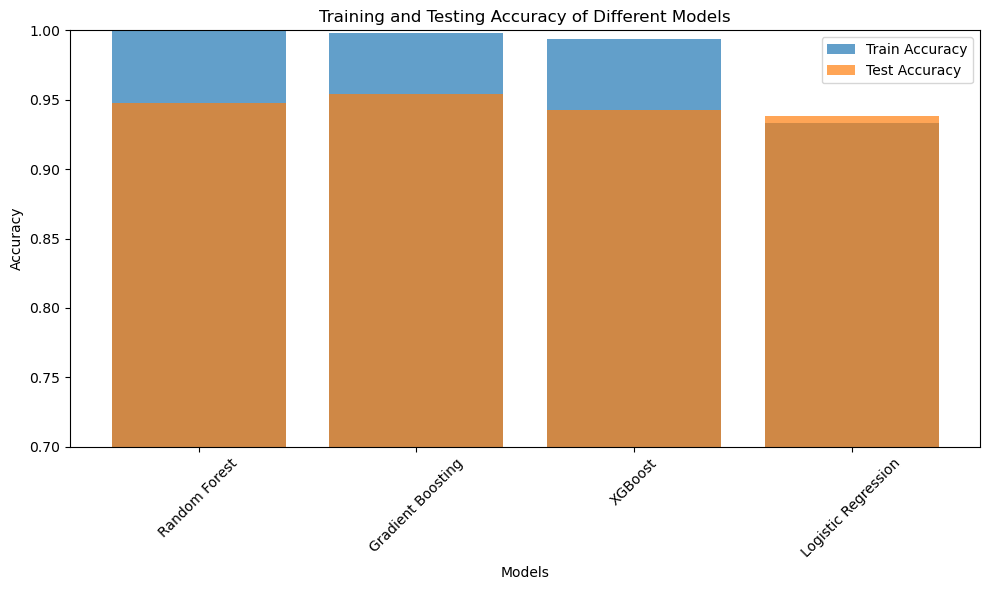

In [58]:
train_accuracies = [rf_train_accuracy, gb_train_accuracy, xgb_train_accuracy, lr_train_accuracy]
test_accuracies = [rf_test_accuracy, gb_test_accuracy, xgb_test_accuracy, lr_test_accuracy]
models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Logistic Regression']

plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, label='Train Accuracy', alpha=0.7)
plt.bar(models, test_accuracies, label='Test Accuracy', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim([0.7, 1.0])  
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
